# REFERENCE VALUES FOR FINGERTIP UNIT IN THE APPLICATION OF TOPICAL MEDICATIONS

In [25]:
#Importing Necessary libraries to be used for the project
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import statsmodels.api as sm
import warnings 
warnings.simplefilter('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import mse
from sklearn.metrics import mean_absolute_error
from scipy.stats import ttest_rel
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro
import  statsmodels.stats.multicomp as multi

In [26]:
#Calling the data from excel directory and displaying the top 2 rows
ftu=pd.read_excel('ALL GROUPS.xlsx')
ftu.head(2)

,groups,sex,age,height,weight,arm,forearm,wrist,lowback,thigh,knee,ankle,somatotype,ftu
0,11-20,Female,21,158.0,49,24.0,21.5,14.0,66.0,45.0,33.0,23.0,11.29,2.6
1,11-20,Female,21,153.0,39,21.5,21.0,14.0,62.0,44.0,31.0,21.0,11.93,2.6


In [4]:
#Displaying the shape and size of the data
shape, size=ftu.shape, ftu.size
print('The data shape is ', shape)  # 600 rows and 14 columns
print('The data size is ', size)    # 8400 obeservations

The data shape is  (600, 14)
The data size is  8400


In [65]:
# Checking the data structure of the data
ftu.dtypes

groups            object
sex               object
age                int64
height           float64
weight             int64
arm              float64
forearm          float64
wrist            float64
lowback          float64
thigh            float64
knee             float64
ankle            float64
somatotype       float64
ftu              float64
bmi              float64
height_meters    float64
dtype: object

In [5]:
# Brief summary of the whole data
ftu.describe()

,age,height,weight,arm,forearm,wrist,lowback,thigh,knee,ankle,somatotype,ftu
count,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,599.000000
mean,40.25500,164.480333,64.256667,28.093667,25.355000,16.048000,80.818667,49.72700,36.246167,22.797500,10.876367,2.474457
std,16.70744,9.227290,14.325134,13.180999,8.540684,2.469425,14.412873,8.58044,3.719728,2.319967,1.044498,0.322405
min,11.00000,116.000000,31.000000,13.500000,18.500000,11.500000,25.600000,5.40000,21.000000,2.500000,2.560000,1.500000
25%,23.75000,158.000000,54.000000,24.500000,23.000000,15.000000,71.500000,44.00000,34.000000,21.500000,9.880000,2.300000
50%,41.00000,164.500000,62.000000,27.000000,25.000000,16.000000,76.850000,48.25000,36.000000,22.500000,11.235000,2.500000
75%,55.00000,171.000000,72.250000,29.500000,26.500000,16.725000,87.925000,54.00000,38.000000,24.000000,11.550000,2.700000
max,71.00000,194.000000,119.000000,333.100000,222.700000,68.000000,129.000000,84.00000,51.000000,36.500000,12.870000,3.400000


#### Calculating BMI- weight divide height_square

In [19]:
#Calculating BMI
ftu['bmi']=py.round(ftu['weight']/(ftu['height']/100)**2, 2)
ftu.head(1)

,groups,sex,age,height,weight,arm,forearm,wrist,lowback,thigh,knee,ankle,somatotype,ftu,bmi
0,11-20,Female,21,158.0,49,24.0,21.5,14.0,66.0,45.0,33.0,23.0,11.29,2.6,19.63


#### Checking for missing values and replacing with the mean

In [7]:
#Checking for total number of missing value/values
ftu.isnull().sum().sum()       # so we have just 1 missing value.

1

In [8]:
#Check for the column with missing value
ftu.isnull().sum()  # so ftu column has just 1 missing value

groups        0
sex           0
age           0
height        0
weight        0
arm           0
forearm       0
wrist         0
lowback       0
thigh         0
knee          0
ankle         0
somatotype    0
ftu           1
bmi           0
dtype: int64

In [46]:
#Checking for the exact row/index from ftun column which has the missing value from the entire project
ftu[ftu.isnull().any(axis=1)]   # so row/index number 80, ftu column has a missing value (NaN)

,groups,sex,age,height,weight,arm,forearm,wrist,lowback,thigh,knee,ankle,somatotype,ftu,bmi
80,11-20,Male,17,172.0,53,23.5,23.5,16.0,65.9,39.0,36.0,22.5,11.75,NaN,17.92


In [47]:
# Checking the mean for ftu column
py.round(ftu['ftu'].mean(), 1)  # The mean to is 2.5-- SO 2.5 will be replaced at row 80

2.5

In [3]:
#Replacing missing value with mean
ftu['ftu']=py.round(ftu['ftu'].fillna(ftu['ftu'].mean()), 1)

In [4]:
#Re-checking for missin values, checking the exact row if it has being replaced
ftu.isnull().sum().sum()   # It was 1 before--- Now 0

0

In [5]:
# Going through row 79 and 80 ti check if it has being replaced with 2.5
ftu.loc[79:80, ['ftu']]    # Replaced -- SO we are good to go

,ftu
79,1.8
80,2.5


In [51]:
# Re-checking for missing value
ftu.isnull().sum().sum()  # Hallelujah- no more missing value- !!! GOOD TO GO

0

### Gender distribution of each age group in percentage-- Objective 1- 

In [15]:
ftu.groupby('groups')['sex'].value_counts()

groups  sex   
11-20   Female    74
        Male      26
21-30   Female    52
        Male      48
31-40   Female    54
        Male      46
41-50   Female    56
        Male      44
51-60   Female    65
        Male      35
61-70   Male      60
        Female    40
Name: sex, dtype: int64

### Mean values of age and selected anthropometric variables of the age groups -- Objective 2- 

In [25]:
all_columns=['age','height', 'weight', 'arm', 'forearm', 'wrist', 'lowback', 'thigh', 'knee', 
             'ankle', 'somatotype','bmi', 'ftu']
mean_all_groups=ftu.groupby('groups')[all_columns].mean()
py.round(mean_all_groups, 1)    # NB- All anthropemetric variables are in centimeters

,age,height,weight,arm,forearm,wrist,lowback,thigh,knee,ankle,somatotype,bmi,ftu
groups,,,,,,,,,,,,,
11-20,17.8,162.1,54.1,24.6,23.2,15.6,71.8,44.9,34.9,22.8,11.0,20.7,2.5
21-30,24.0,167.7,61.9,30.1,25.3,16.7,76.4,49.0,35.9,23.8,10.9,22.1,2.7
31-40,35.0,164.3,64.1,27.7,25.1,15.7,80.9,49.0,36.8,22.6,11.0,23.8,2.4
41-50,45.3,166.2,71.0,29.5,26.1,16.2,85.6,50.4,37.5,22.8,10.8,25.8,2.4
51-60,55.1,162.4,68.2,28.6,27.2,16.0,87.2,52.2,36.3,22.4,10.7,25.8,2.4
61-70,64.4,164.2,66.3,28.0,25.3,16.1,83.0,52.8,36.1,22.4,10.8,24.7,2.4


### Comparison of ftu, girth measurements for different  age groups-- By using ANOVA test -- Objective 3

In [52]:
#Getting values from categorical variables for the 6 age groups--- FTU
test1=ftu[ftu['groups']== '11-20'].ftu
test2=ftu[ftu['groups']== '21-30'].ftu
test3=ftu[ftu['groups']== '31-40'].ftu
test4=ftu[ftu['groups']== '41-50'].ftu
test5=ftu[ftu['groups']== '51-60'].ftu
test6=ftu[ftu['groups']== '61-70'].ftu
def anova(test1,test2,test3,test4,test5,test6,alpha=0.05):
    t,p=stats.f_oneway(test1,test2,test3,test4,test5,test6)
    print ('t-Statistics= %.2f' % t)
    print ('p-value= %.3f' %p)
    if p > alpha:
        print ('Verdict: Accept the null hypothesis- there is no difference')
    if p <=alpha:
        print ('Verdict : Reject the null hypothesis- there is difference')
anova(test1,test2,test3,test4,test5,test6)

t-Statistics= 15.39
p-value= 0.000
Verdict : Reject the null hypothesis- there is difference


### Boxplot to show how ftu is distributed acrosss all age groups

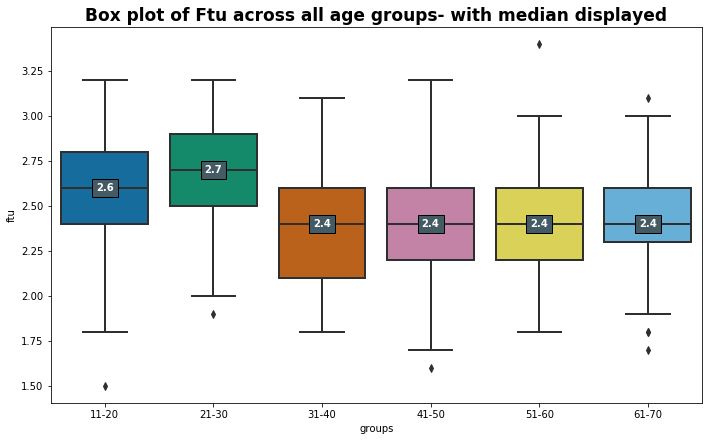

In [8]:
fig_dims=(10,6)
fig,ax=plt.subplots(figsize=fig_dims)
boxplot=sns.boxplot(x=ftu['groups'], y=ftu['ftu'], data=ftu, palette='colorblind', linewidth=2)
#striplot=sns.stripplot(x=ftu['groups'], y=ftu['ftu'], data=ftu, jitter=True, split=True, linewidth=0.5)
ax = boxplot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1)
    ax.text(cat, y, f'{y}', ha='center', va='center', fontweight='bold', size=10,color='white',
            bbox=dict(facecolor='#445A64'))
boxplot.figure.tight_layout()
plt.title('Box plot of Ftu across all age groups- with median displayed', weight='bold', size=17)
plt.show()

In [15]:
#ARM
test1=ftu[ftu['groups']== '11-20'].arm
test2=ftu[ftu['groups']== '21-30'].arm
test3=ftu[ftu['groups']== '31-40'].arm
test4=ftu[ftu['groups']== '41-50'].arm
test5=ftu[ftu['groups']== '51-60'].arm
test6=ftu[ftu['groups']== '61-70'].arm
def anova(test1,test2,test3,test4,test5,test6,alpha=0.05):
    t,p=stats.f_oneway(test1,test2,test3,test4,test5,test6)
    print('t-Statistics= %.2f' % t)
    print('p-value= %.3f' %p)
    if p > alpha:
        print ('Verdict: Accept the null hypothesis- there is no difference')
    if p <=alpha:
        print ('Verdict : Reject the null hypothesis- there is difference')
anova(test1,test2,test3,test4,test5,test6)

t-Statistics= 2.19
p-value= 0.054
Verdict: Accept the null hypothesis- there is no difference


In [24]:
#FOREARM
test1=ftu[ftu['groups']== '11-20'].forearm
test2=ftu[ftu['groups']== '21-30'].forearm
test3=ftu[ftu['groups']== '31-40'].forearm
test4=ftu[ftu['groups']== '41-50'].forearm
test5=ftu[ftu['groups']== '51-60'].forearm
test6=ftu[ftu['groups']== '61-70'].forearm
def anova(test1,test2,test3,test4,test5,test6,alpha=0.05):
    t,p=stats.f_oneway(test1,test2,test3,test4,test5,test6)
    print ('t-Statistics= %.2f' % t)
    print ('p-value= %.3f' %p)
    if p > alpha:
        print ('Verdict: Accept the null hypothesis- there is no difference')
    if p <=alpha:
        print ('Verdict : Reject the null hypothesis- there is difference')
anova(test1,test2,test3,test4,test5,test6)

t-Statistics= 2.41
p-value= 0.036
Verdict : Reject the null hypothesis- there is difference


In [25]:
#WRIST
test1=ftu[ftu['groups']== '11-20'].wrist
test2=ftu[ftu['groups']== '21-30'].wrist
test3=ftu[ftu['groups']== '31-40'].wrist
test4=ftu[ftu['groups']== '41-50'].wrist
test5=ftu[ftu['groups']== '51-60'].wrist
test6=ftu[ftu['groups']== '61-70'].wrist
def anova(test1,test2,test3,test4,test5,test6,alpha=0.05):
    t,p=stats.f_oneway(test1,test2,test3,test4,test5,test6)
    print ('t-Statistics= %.2f' % t)
    print ('p-value= %.3f' %p)
    if p > alpha:
        print ('Verdict: Accept the null hypothesis- there is no difference')
    if p <=alpha:
        print ('Verdict : Reject the null hypothesis- there is difference')
anova(test1,test2,test3,test4,test5,test6)

t-Statistics= 2.64
p-value= 0.022
Verdict : Reject the null hypothesis- there is difference


In [26]:
#LOWBACK
test1=ftu[ftu['groups']== '11-20'].lowback
test2=ftu[ftu['groups']== '21-30'].lowback
test3=ftu[ftu['groups']== '31-40'].lowback
test4=ftu[ftu['groups']== '41-50'].lowback
test5=ftu[ftu['groups']== '51-60'].lowback
test6=ftu[ftu['groups']== '61-70'].lowback
def anova(test1,test2,test3,test4,test5,test6,alpha=0.05):
    t,p=stats.f_oneway(test1,test2,test3,test4,test5,test6)
    print ('t-Statistics= %.2f' % t)
    print ('p-value= %.3f' %p)
    if p > alpha:
        print ('Verdict: Accept the null hypothesis- there is no difference')
    if p <=alpha:
        print ('Verdict : Reject the null hypothesis- there is difference')
anova(test1,test2,test3,test4,test5,test6)

t-Statistics= 18.55
p-value= 0.000
Verdict : Reject the null hypothesis- there is difference


In [27]:
#THIGH
test1=ftu[ftu['groups']== '11-20'].thigh
test2=ftu[ftu['groups']== '21-30'].thigh
test3=ftu[ftu['groups']== '31-40'].thigh
test4=ftu[ftu['groups']== '41-50'].thigh
test5=ftu[ftu['groups']== '51-60'].thigh
test6=ftu[ftu['groups']== '61-70'].thigh
def anova(test1,test2,test3,test4,test5,test6,alpha=0.05):
    t,p=stats.f_oneway(test1,test2,test3,test4,test5,test6)
    print ('t-Statistics= %.2f' % t)
    print ('p-value= %.3f' %p)
    if p > alpha:
        print ('Verdict: Accept the null hypothesis- there is no difference')
    if p <=alpha:
        print ('Verdict : Reject the null hypothesis- there is difference')
anova(test1,test2,test3,test4,test5,test6)

t-Statistics= 12.08
p-value= 0.000
Verdict : Reject the null hypothesis- there is difference


In [28]:
#KNEE
test1=ftu[ftu['groups']== '11-20'].knee
test2=ftu[ftu['groups']== '21-30'].knee
test3=ftu[ftu['groups']== '31-40'].knee
test4=ftu[ftu['groups']== '41-50'].knee
test5=ftu[ftu['groups']== '51-60'].knee
test6=ftu[ftu['groups']== '61-70'].knee
def anova(test1,test2,test3,test4,test5,test6,alpha=0.05):
    t,p=stats.f_oneway(test1,test2,test3,test4,test5,test6)
    print ('t-Statistics= %.2f' % t)
    print ('p-value= %.3f' %p)
    if p > alpha:
        print ('Verdict: Accept the null hypothesis- there is no difference')
    if p <=alpha:
        print ('Verdict : Reject the null hypothesis- there is difference')
anova(test1,test2,test3,test4,test5,test6)

t-Statistics= 5.48
p-value= 0.000
Verdict : Reject the null hypothesis- there is difference


In [29]:
#ANKLE
test1=ftu[ftu['groups']== '11-20'].ankle
test2=ftu[ftu['groups']== '21-30'].ankle
test3=ftu[ftu['groups']== '31-40'].ankle
test4=ftu[ftu['groups']== '41-50'].ankle
test5=ftu[ftu['groups']== '51-60'].ankle
test6=ftu[ftu['groups']== '61-70'].ankle
def anova(test1,test2,test3,test4,test5,test6,alpha=0.05):
    t,p=stats.f_oneway(test1,test2,test3,test4,test5,test6)
    print ('t-Statistics= %.2f' % t)
    print ('p-value= %.3f' %p)
    if p > alpha:
        print ('Verdict: Accept the null hypothesis- there is no difference')
    if p <=alpha:
        print ('Verdict : Reject the null hypothesis- there is difference')
anova(test1,test2,test3,test4,test5,test6)

t-Statistics= 5.66
p-value= 0.000
Verdict : Reject the null hypothesis- there is difference


### Comparison of male and female ftu - using Unpaired/independent t-test -- Objective 4

In [42]:
def unpaired(test1,test2, alpha=0.05):
    t, p=stats.ttest_ind(test1,test2, nan_policy='omit')
    print ('t-Statistics= %.3f' % t)
    print ('p-value= %.3f' %p)
    if p > alpha:
        print ('Verdict: Accept the null hypothesis- there is no difference between the 2 paired sample means')
    if p <=alpha:
        print ('Verdict : Reject the null hypothesis- there is difference between the 2 paired sample means')
test1=ftu[ftu['sex']== 'Male'].ftu
test1=ftu[ftu['sex']== 'Female'].ftu
unpaired(test1,test2)

t-Statistics= -8.749
p-value= 0.000
Verdict : Reject the null hypothesis- there is difference between the 2 paired sample means


### Correlation between all variables and ftu -- Objective 5

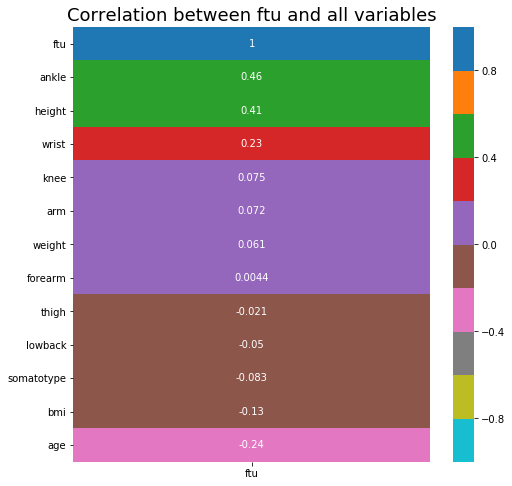

In [56]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(ftu.corr()[['ftu']].sort_values(by='ftu', ascending=False), vmin=-1, vmax=1, 
                      annot=True, cmap='tab10_r')      
heatmap.set_title('Correlation between ftu and all variables', fontdict={'fontsize':18});

### Result of regression analyses for fingertip unit

In [20]:
#Regression analysis using statsmodels OLS method
X=ftu[['age','height', 'weight', 'arm', 'forearm', 'wrist', 'lowback', 'thigh', 'knee', 'ankle', 'somatotype','bmi']]
y=ftu['ftu']     # The coefficient of determination-Rsquare=38.3%
X=sm.add_constant(X) #Our indept vriables explain 38.3% of the variability of our dept variable
result=sm.OLS(y,X).fit() # F-stats from ANova-30.40- significant <0.05
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ftu   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     30.40
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           4.04e-54
Time:                        23:12:06   Log-Likelihood:                -26.208
No. Observations:                 600   AIC:                             78.42
Df Residuals:                     587   BIC:                             135.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0753      0.955     -1.126      0.261      -2.952       0.801
age           -0.0031      0.001     -4.426      0.000      -0.005      -0.002
height         0.0240      0.006      4.247      0.000       0.013       0.035
weight        -0.0159      0.007     -2.200      0.028      -0.030      -0.002
arm            0.0014      0.001      1.612      0.108      -0.000       0.003
forearm       -0.0008      0.001     -0.666      0.506      -0.003       0.002
wrist         -0.0051      0.006     -0.816      0.415      -0.017       0.007
lowback        0.0011      0.001      0.828      0.408      -0.001       0.004
thigh          0.0026      0.001      1.818      0.070      -0.000       0.005
knee          -0.0061      0.004     -1.553      0.121      -0.014       0.002
ankle          0.0471      0.005      8.868      0.000       0.037       0.057
somatotype    -0.0844      0.017     -5.089      0.000      -0.117      -0.052
bmi            0.0274      0.019      1.449      0.148      -0.010       0.065
==============================================================================
Omnibus:                        5.281   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                5.531
Skew:                          -0.155   Prob(JB):                       0.0629
Kurtosis:                       3.354   Cond. No.                     1.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# Making predictions from the independent variables 
y_pred=result.predict(X)
y_pred.head(2)    #  showing the first 2 rows for predicted y

0    2.480241
1    2.291220
dtype: float64

In [22]:
#Creating a dataframe for actual ftu from data and predicted ftu and displaying top 10 rows
df=pd.DataFrame({'Actual ftu':y, 'Predicted ftu':y_pred})
df.head(11)

,Actual ftu,Predicted ftu
0,2.6,2.480241
1,2.6,2.291220
2,2.6,2.532858
3,2.5,2.408065
4,2.7,2.426975
5,2.6,2.679879
6,2.7,2.560192
7,2.8,2.834462
8,2.7,2.501279
9,2.9,2.514976


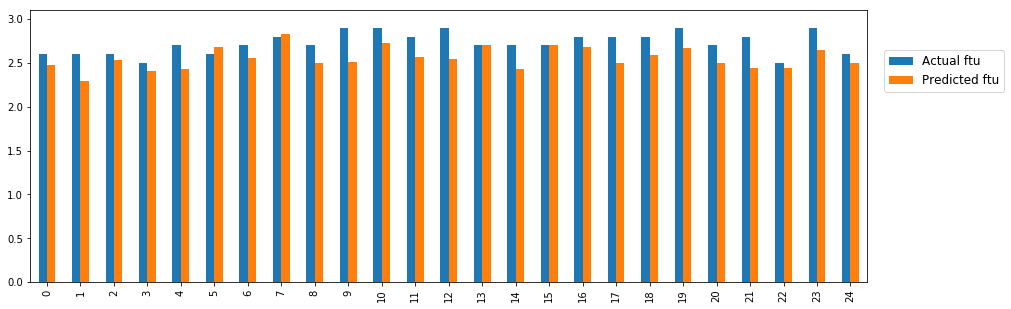

In [23]:
#We could also plot the barchart for predicted and actual ftu for the first 25 rows
df.head(25).plot(kind='bar', figsize=(15,5))
plt.ylim(0,3.1)
plt.legend(loc=[1.02, 0.7], fontsize='large')
plt.show()

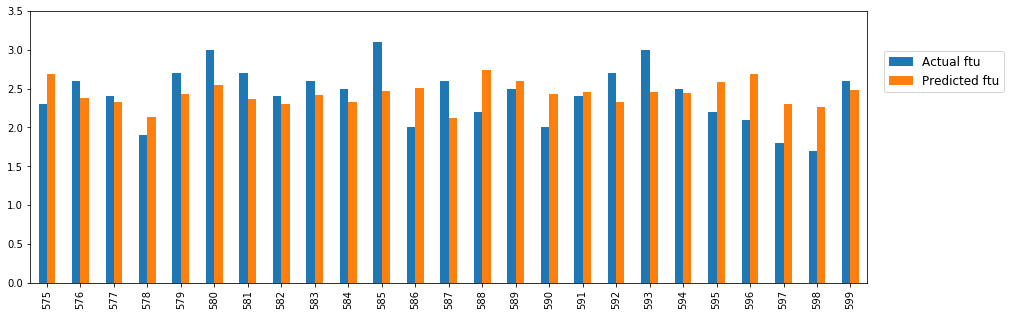

In [74]:
#We could also plot the barchart for predicted and actual ftu for the 25 rows from the tail
df.tail(25).plot(kind='bar', figsize=(15,5))
plt.ylim(0,3.5)
plt.legend(loc=[1.02, 0.7], fontsize='large')
plt.show()

In [24]:
#Getting the errors for our regression analysis
mse=mse(y, y_pred)
rmse=py.sqrt(mse)
mae=mean_absolute_error(y,y_pred)
print('Mean Absolute Error (MAE): {}'.format(mae))
print('Mean Squared Error (MSE): {}'.format(mse))
print('Root Mean Squared Error (RMSE): {}'.format(rmse))

Mean Absolute Error (MAE): 0.19903444577973947
Mean Squared Error (MSE): 0.0638947862480611
Root Mean Squared Error (RMSE): 0.25277418034297156
